In [2]:
import yfinance as yf
import pandas as pd 
import numpy as np

In [45]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

In [3]:
from datetime import datetime

# for time stamps
yf.pdr_override()

# define the top 7 S&P 500 companies
top_7_list = ['GOOG', 'NVDA', 'AMZN', 'META', 'TSLA', 'AAPL', 'MSFT']

# set the date range
end = datetime.now()
start = datetime(end.year - 9, end.month, end.day)

# download the data and concatenate into a single DataFrame
top_7_dfs = [yf.download(stock, start, end).assign(Company=stock) for stock in top_7_list]
top_7_df = pd.concat(top_7_dfs)

top_7_df.tail()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Company
Date,,,,,,,
2024-03-08,407.959991,410.420013,404.329987,406.220001,406.220001,17971700,MSFT
2024-03-11,403.760010,405.679993,401.260010,404.519989,404.519989,16120800,MSFT
2024-03-12,407.619995,415.570007,406.790009,415.279999,415.279999,22457000,MSFT
2024-03-13,418.100006,418.179993,411.450012,415.100006,415.100006,17115900,MSFT
2024-03-14,420.239990,427.820007,417.989990,425.220001,425.220001,34113100,MSFT


In [3]:
spy_df = yf.download('SPY', start, end)
spy_df['ETF'] = 'SPY' 

spy_df.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,ETF
Date,,,,,,,
2024-03-08,515.460022,518.219971,511.130005,511.720001,511.720001,86425500,SPY
2024-03-11,510.480011,511.880005,508.500000,511.279999,511.279999,62557200,SPY
2024-03-12,513.450012,517.380005,510.859985,516.780029,516.780029,73114400,SPY
2024-03-13,517.109985,517.289978,514.489990,515.969971,515.969971,55104100,SPY
2024-03-14,516.969971,517.130005,511.820007,514.950012,514.950012,110071500,SPY


In [4]:
# define the bottom 20 S&P 500 companies
bottom_20_list = ['ETSY', 'FMC', 'FRT', 'GNRC', 'HAS', 'IVZ', 'MHK', 'MKTX', 'NCLH', 'PARA',
                  'PNW', 'RHI', 'VFC', 'WHR', 'XRAY', 'ZION']

# download data and concatenate into a single DataFrame
bottom_20_dfs = [yf.download(stock, start, end).assign(Company=stock) for stock in bottom_20_list]
bottom_20_df = pd.concat(bottom_20_dfs)

bottom_20_df.tail()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

,Open,High,Low,Close,Adj Close,Volume,Company
Date,,,,,,,
2024-03-08,42.230000,42.950001,42.060001,42.240002,42.240002,2459500,ZION
2024-03-11,42.270000,42.439999,41.240002,41.610001,41.610001,2607800,ZION
2024-03-12,41.630001,42.040001,40.669998,40.900002,40.900002,2254900,ZION
2024-03-13,40.650002,41.369999,40.570000,41.070000,41.070000,1956600,ZION
2024-03-14,40.830002,41.049999,39.230000,39.799999,39.799999,2837400,ZION


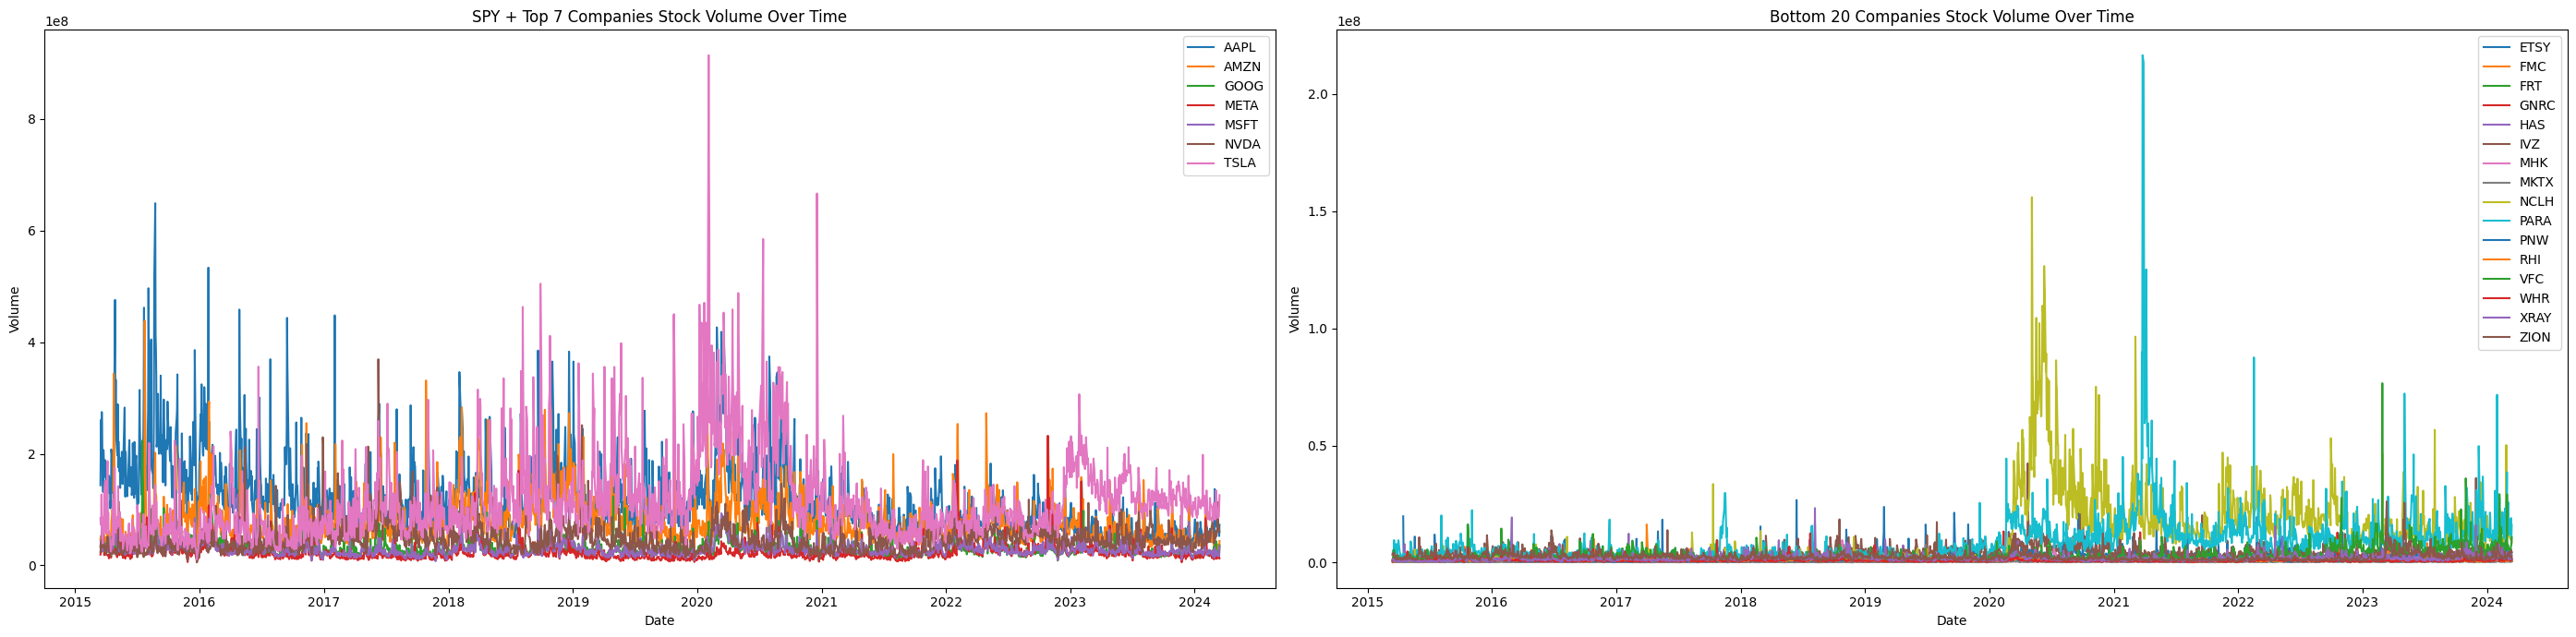

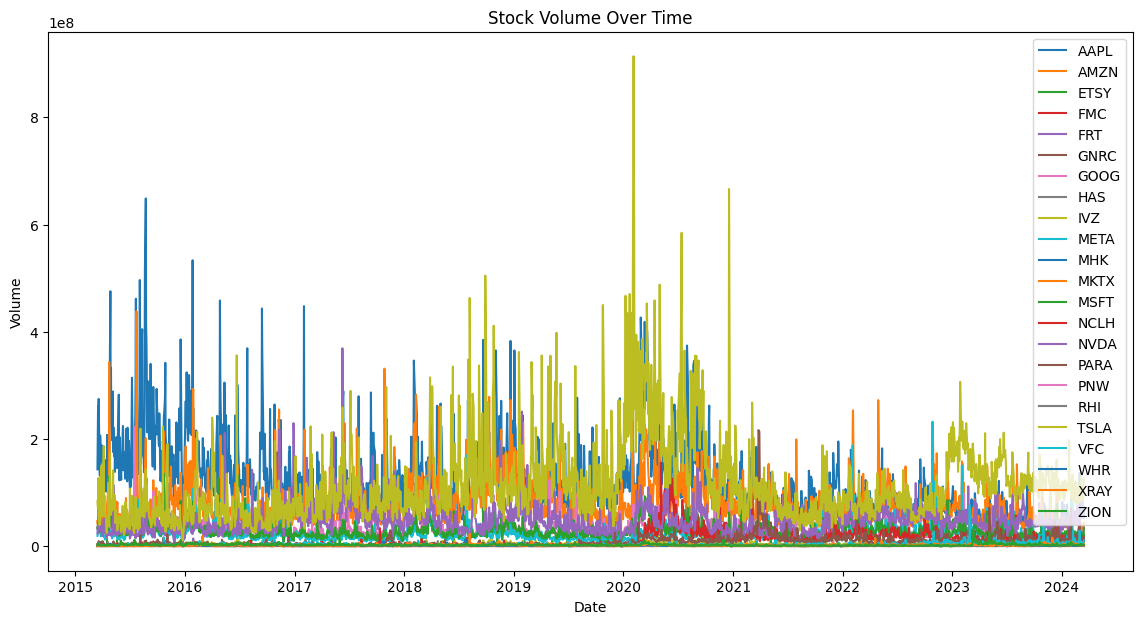

In [5]:
import matplotlib.pyplot as plt

# combine all DataFrames for plotting
combined_df = pd.concat([top_7_df, bottom_20_df, spy_df])
spy_top_7_df = pd.concat([top_7_df, spy_df])

# convert the index to a 'Date' column if it's not already a column
if isinstance(combined_df.index, pd.DatetimeIndex):
    combined_df.reset_index(inplace=True)
    combined_df.rename(columns={'index': 'Date'}, inplace=True)
    
if isinstance(spy_top_7_df.index, pd.DatetimeIndex):
    spy_top_7_df.reset_index(inplace=True)
    spy_top_7_df.rename(columns={'index': 'Date'}, inplace=True)
    
if isinstance(bottom_20_df.index, pd.DatetimeIndex):
    bottom_20_df.reset_index(inplace=True)
    bottom_20_df.rename(columns={'index': 'Date'}, inplace=True)

# plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(28, 7))

for label, df in spy_top_7_df.groupby('Company'):
    axes[0].plot(df['Date'], df['Volume'], label=label)
axes[0].set_title('SPY + Top 7 Companies Stock Volume Over Time')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Volume')
axes[0].legend()

for label, df in bottom_20_df.groupby('Company'):
    axes[1].plot(df['Date'], df['Volume'], label=label)
axes[1].set_title('Bottom 20 Companies Stock Volume Over Time')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Volume')
axes[1].legend()

plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 7))
for label, df in combined_df.groupby('Company'):
    plt.plot(df['Date'], df['Volume'], label=label)

plt.title('Stock Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()


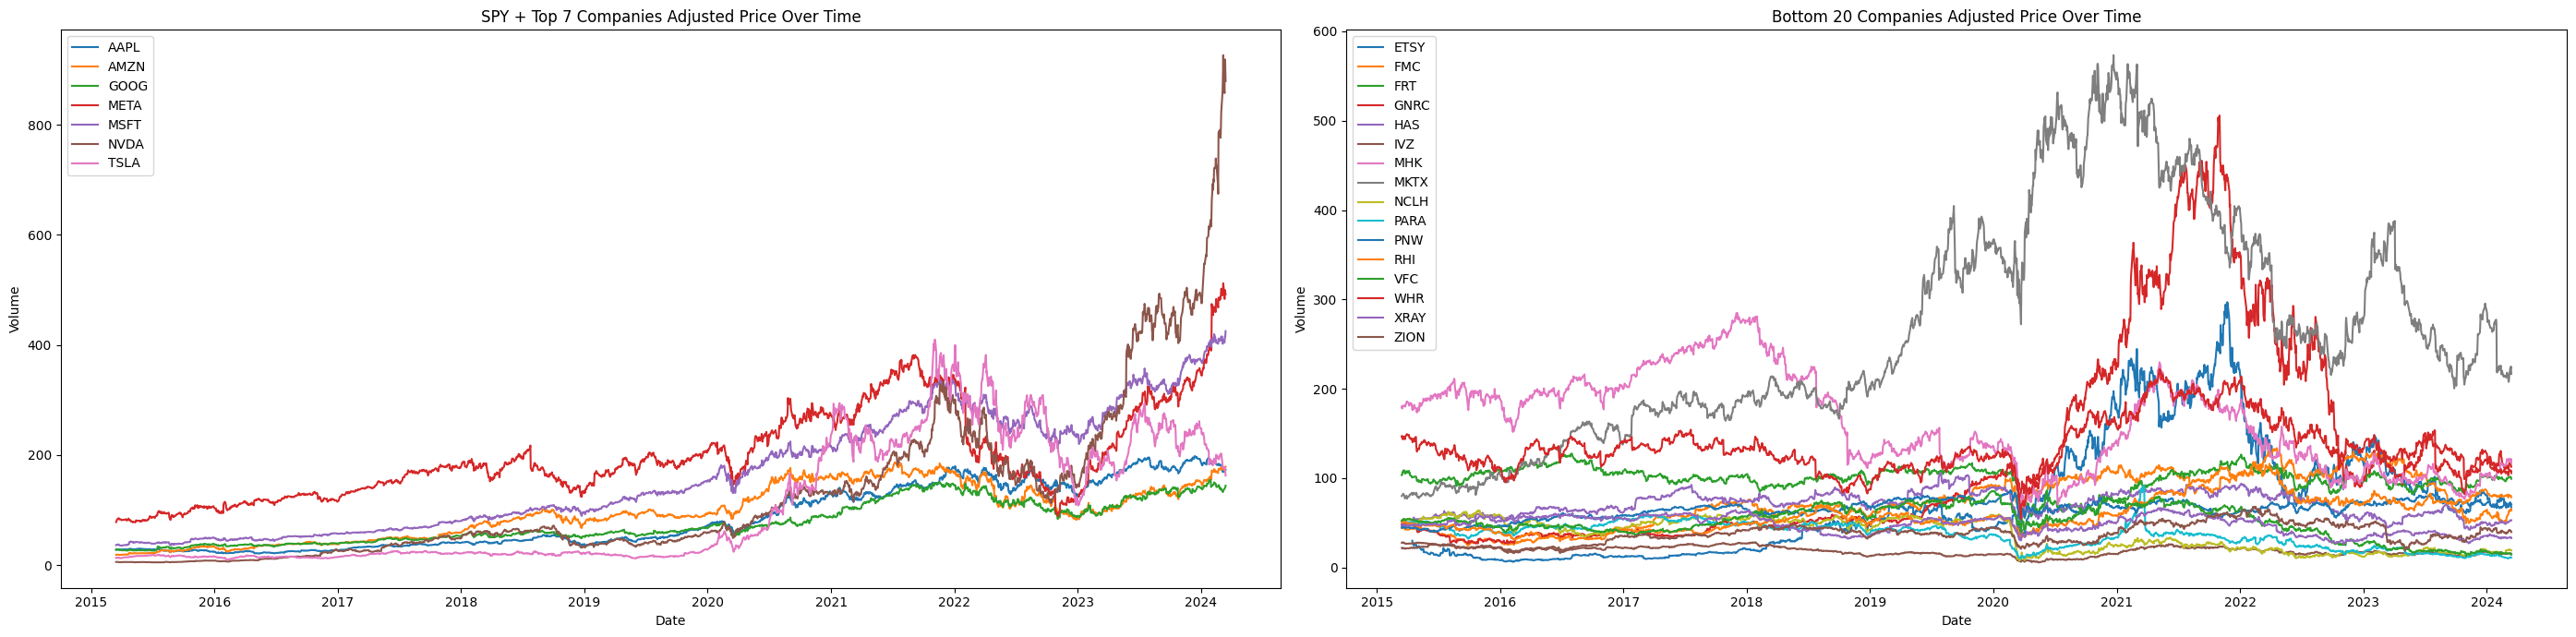

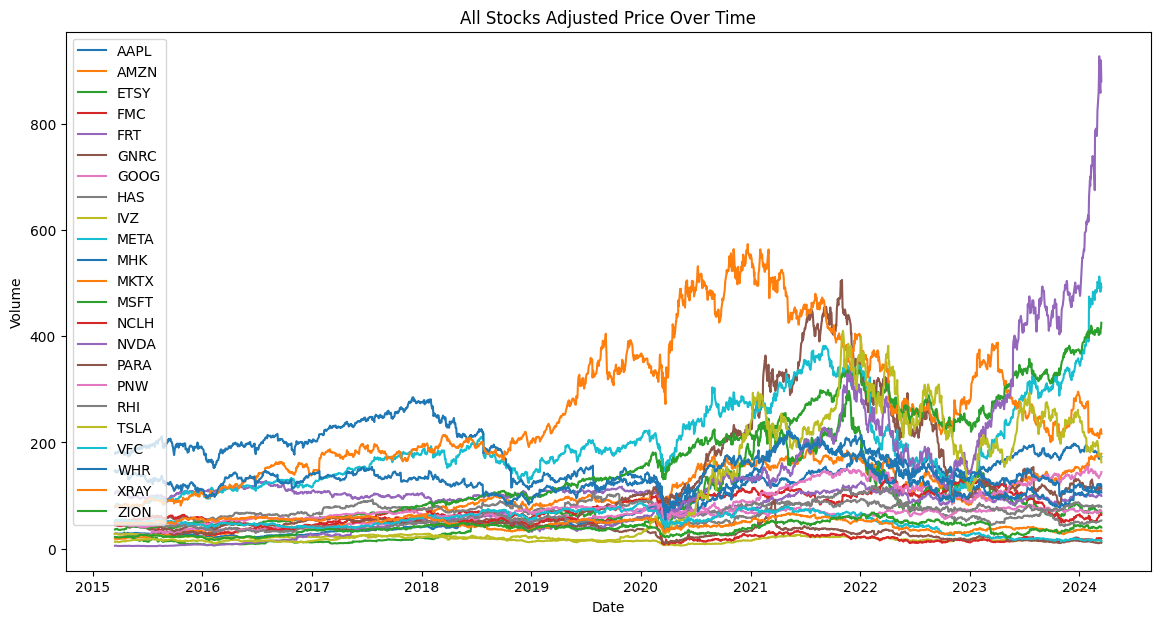

In [6]:
if isinstance(combined_df.index, pd.DatetimeIndex):
    combined_df.reset_index(inplace=True)
    combined_df.rename(columns={'index': 'Date'}, inplace=True)

if isinstance(spy_top_7_df.index, pd.DatetimeIndex):
    spy_top_7_df.reset_index(inplace=True)
    spy_top_7_df.rename(columns={'index': 'Date'}, inplace=True)
    
if isinstance(bottom_20_df.index, pd.DatetimeIndex):
    bottom_20_df.reset_index(inplace=True)
    bottom_20_df.rename(columns={'index': 'Date'}, inplace=True)
    
#plotting

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(28, 7))

for label, df in spy_top_7_df.groupby('Company'):
    axes[0].plot(df['Date'], df['Adj Close'], label=label)
axes[0].set_title('SPY + Top 7 Companies Adjusted Price Over Time')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Volume')
axes[0].legend()

for label, df in bottom_20_df.groupby('Company'):
    axes[1].plot(df['Date'], df['Adj Close'], label=label)
axes[1].set_title('Bottom 20 Companies Adjusted Price Over Time')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Volume')
axes[1].legend()

plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 7))
for label, df in combined_df.groupby('Company'):
    plt.plot(df['Date'], df['Adj Close'], label=label)

plt.title('All Stocks Adjusted Price Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

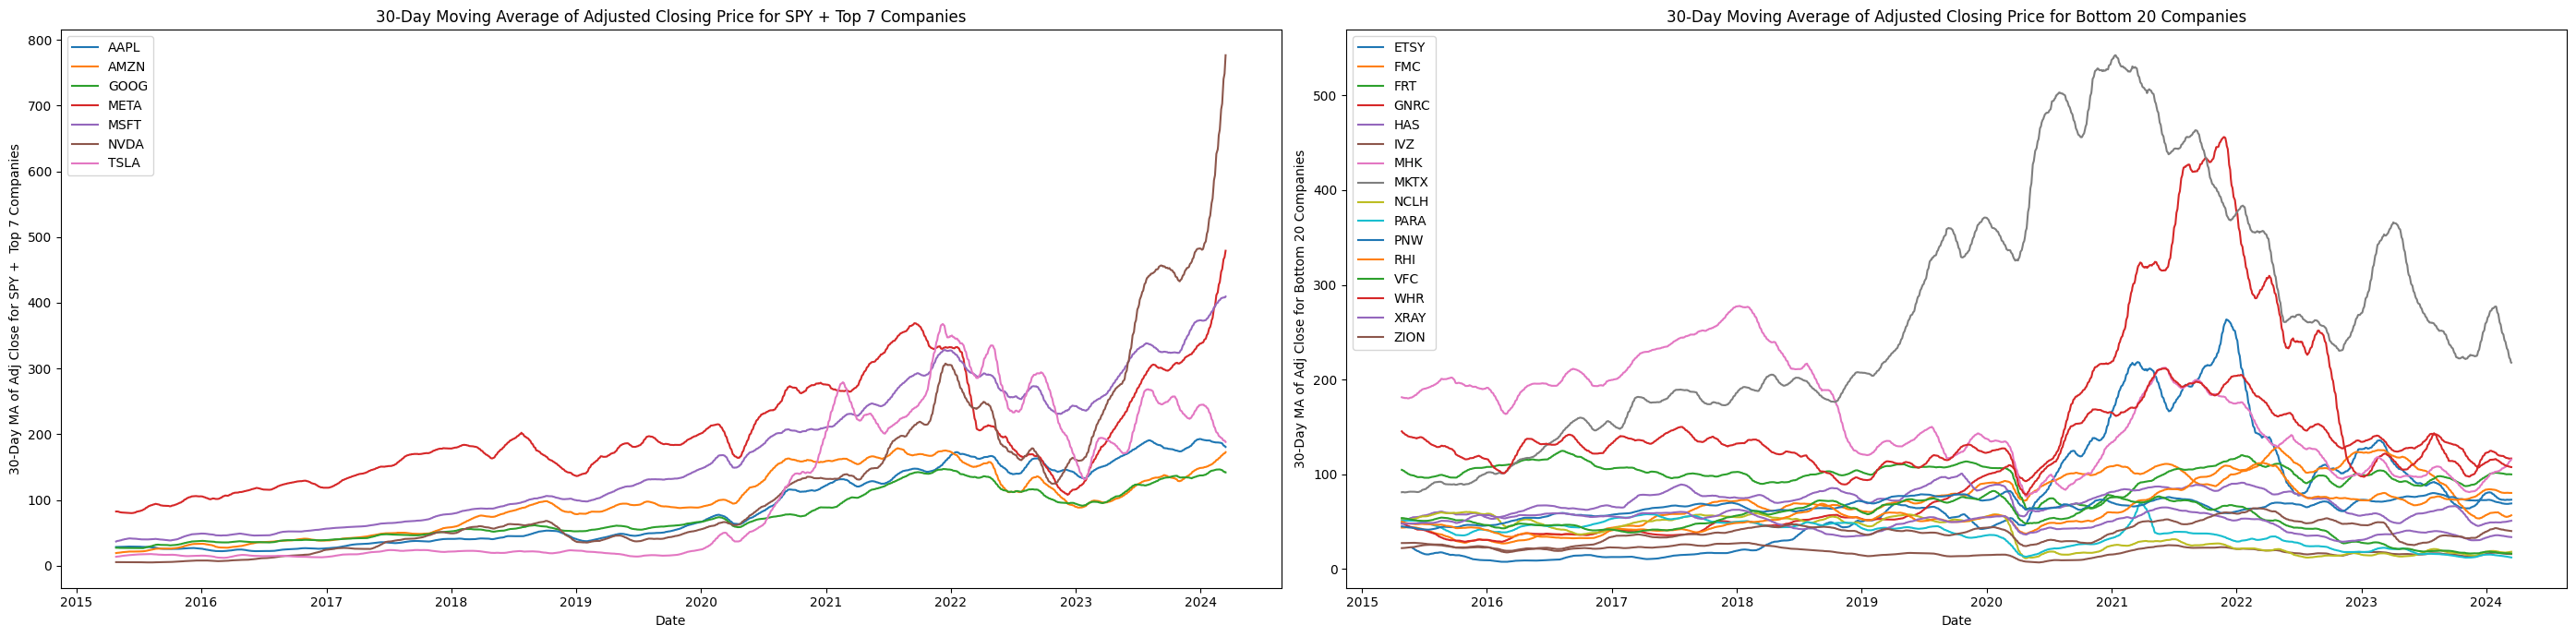

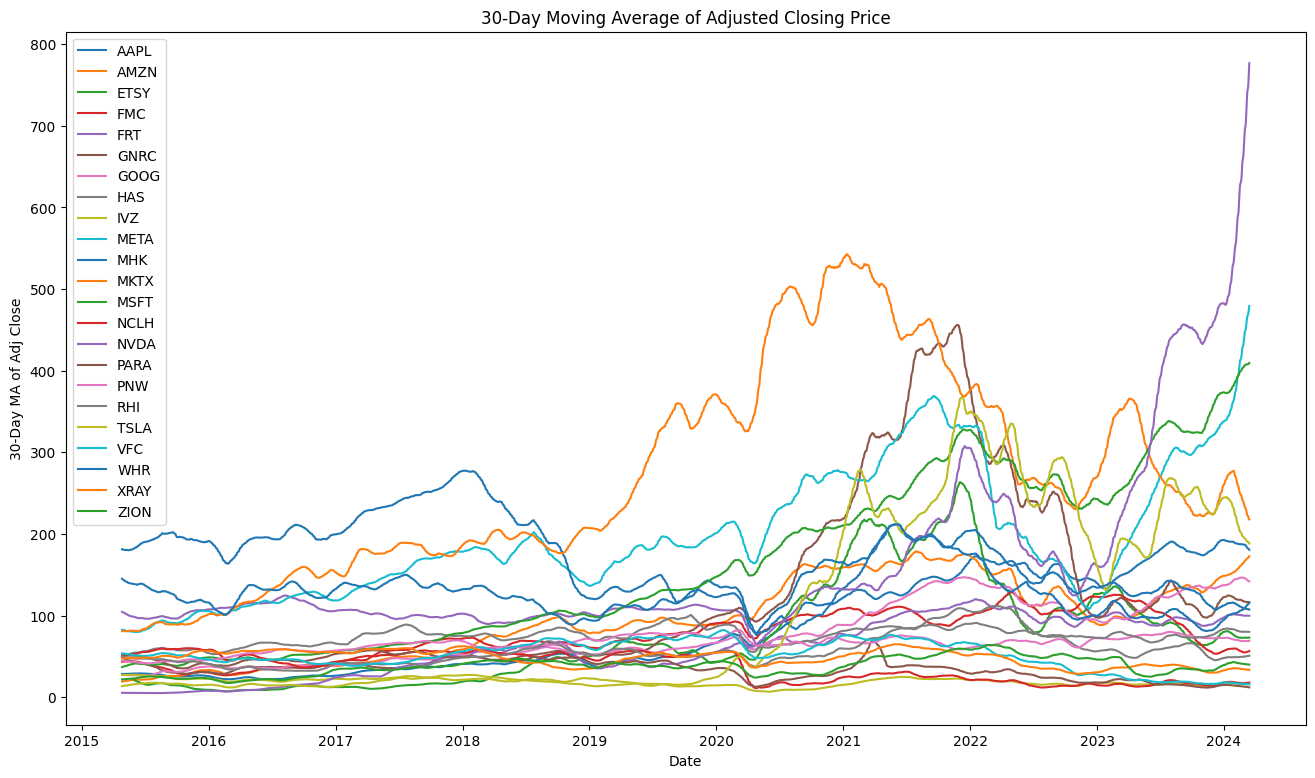

In [7]:
ma = 30  # moving average period

# calculate the 30-day moving average for each company's 'Adj Close'
combined_df[f'MA for {ma} days'] = combined_df.groupby('Company')['Adj Close'].transform(lambda x: x.rolling(window=ma).mean())
spy_top_7_df[f'MA for {ma} days'] = spy_top_7_df.groupby('Company')['Adj Close'].transform(lambda x: x.rolling(window=ma).mean())
bottom_20_df[f'MA for {ma} days'] = bottom_20_df.groupby('Company')['Adj Close'].transform(lambda x: x.rolling(window=ma).mean())

# ensure 'Date' is a column for plotting
if not 'Date' in combined_df.columns:
    combined_df.reset_index(inplace=True)
if not 'Date' in spy_top_7_df.columns:
    spy_top_7_df.reset_index(inplace=True)
if not 'Date' in bottom_20_df.columns:
    bottom_20_df.reset_index(inplace=True)

# plotting

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(28, 7))

for label, df in spy_top_7_df.groupby('Company'):
    axes[0].plot(df['Date'], df[f'MA for {ma} days'], label=label)
axes[0].set_title(f'{ma}-Day Moving Average of Adjusted Closing Price for SPY + Top 7 Companies')
axes[0].set_xlabel('Date')
axes[0].set_ylabel(f'{ma}-Day MA of Adj Close for SPY +  Top 7 Companies')
axes[0].legend()

for label, df in bottom_20_df.groupby('Company'):
    axes[1].plot(df['Date'], df[f'MA for {ma} days'], label=label)
axes[1].set_title(f'{ma}-Day Moving Average of Adjusted Closing Price for Bottom 20 Companies')
axes[1].set_xlabel('Date')
axes[1].set_ylabel(f'{ma}-Day MA of Adj Close for Bottom 20 Companies')
axes[1].legend()

plt.tight_layout()
plt.show()

#plotting combined df
plt.figure(figsize=(16, 9))

for label, df in combined_df.groupby('Company'):
    plt.plot(df['Date'], df[f'MA for {ma} days'], label=label)

plt.title(f'{ma}-Day Moving Average of Adjusted Closing Price')
plt.xlabel('Date')
plt.ylabel(f'{ma}-Day MA of Adj Close')
plt.legend()
plt.show()

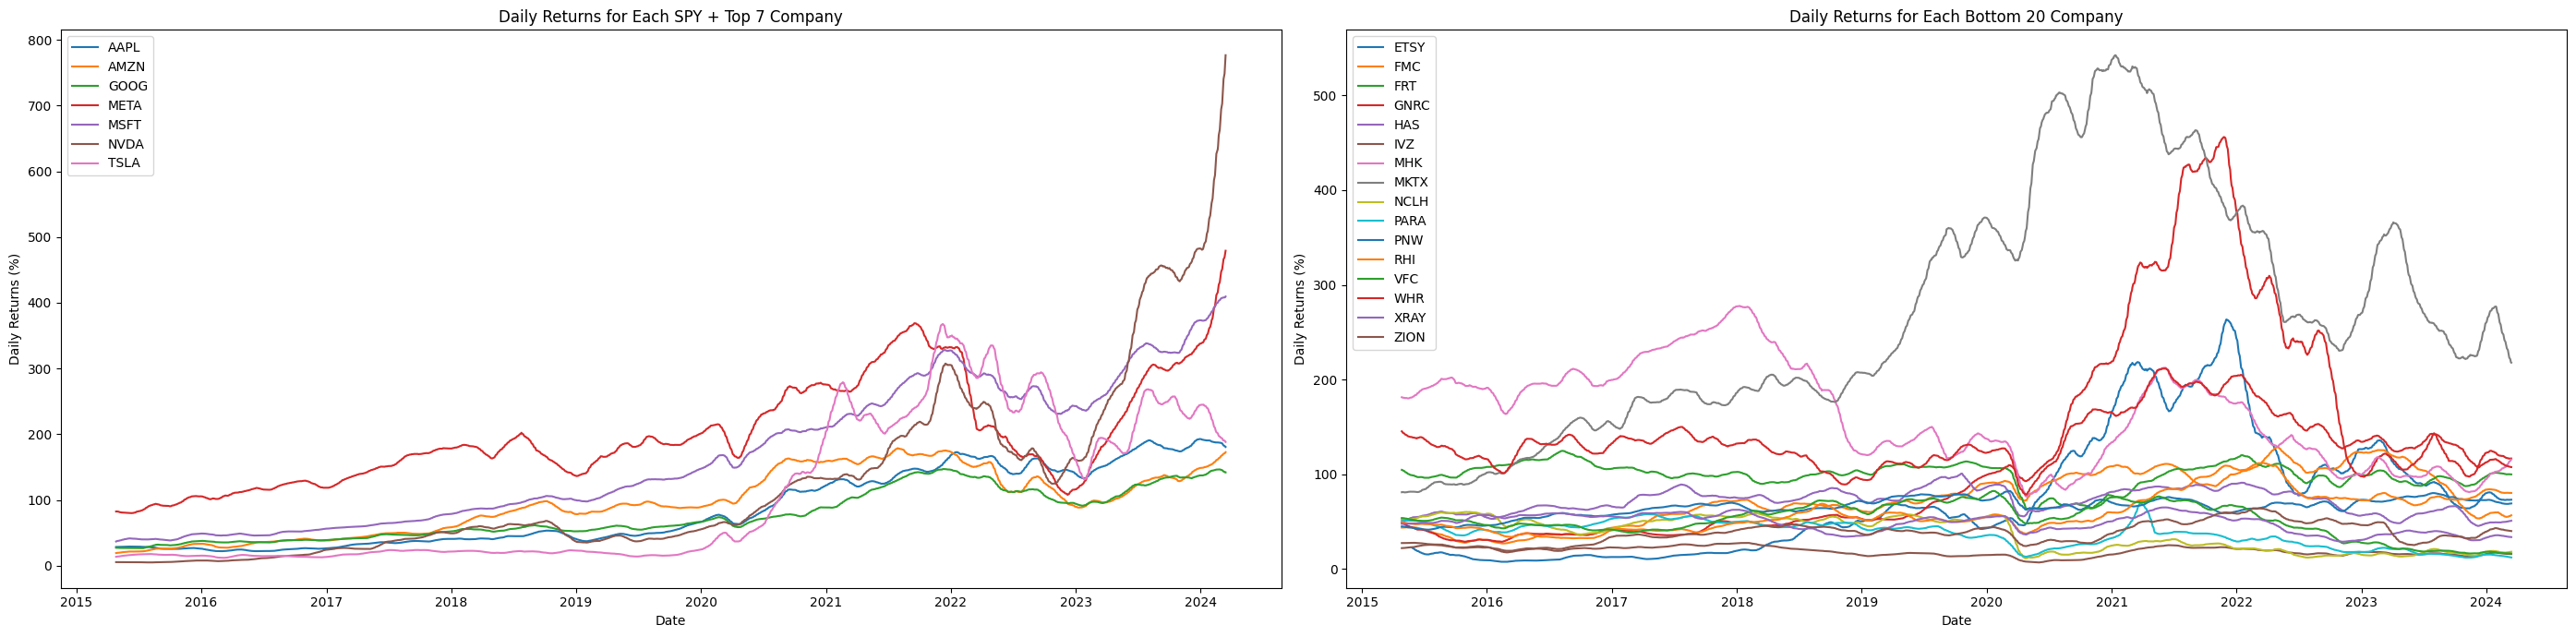

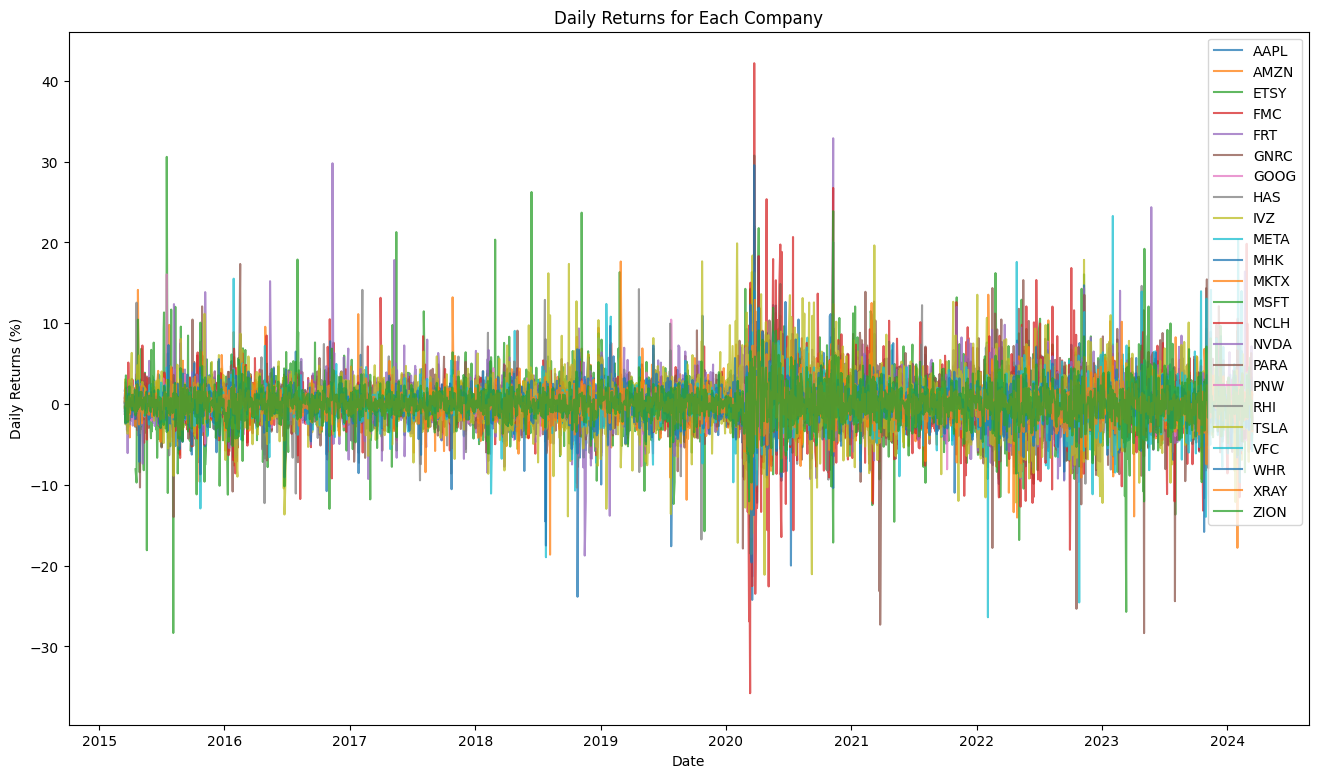

In [10]:
# calculate daily returns for each company
combined_df['Returns'] = combined_df.groupby('Company')['Adj Close'].pct_change() * 100  # Convert to percentage

# make sure that 'Date' column is a column for plotting
if 'Date' not in combined_df.columns:
    combined_df.reset_index(inplace=True)
if not 'Date' in spy_top_7_df.columns:
    spy_top_7_df.reset_index(inplace=True)
if not 'Date' in bottom_20_df.columns:
    bottom_20_df.reset_index(inplace=True)

# plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(28, 7))

for label, df in spy_top_7_df.groupby('Company'):
    axes[0].plot(df['Date'], df[f'MA for {ma} days'], label=label)
axes[0].set_title('Daily Returns for Each SPY + Top 7 Company')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Daily Returns (%)')
axes[0].legend()

for label, df in bottom_20_df.groupby('Company'):
    axes[1].plot(df['Date'], df[f'MA for {ma} days'], label=label)
axes[1].set_title('Daily Returns for Each Bottom 20 Company')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Daily Returns (%)')
axes[1].legend()

plt.tight_layout()
plt.show()

plt.figure(figsize=(16, 9))

for label, df in combined_df.groupby('Company'):
    plt.plot(df['Date'], df['Returns'], label=label, alpha=0.75)

plt.title('Daily Returns for Each Company')
plt.xlabel('Date')
plt.ylabel('Daily Returns (%)')
plt.legend()
plt.show()


In [11]:
def sliding_window(data_mag7, data_spy, data_bottom20, start_date, end_date, train_days, test_days):
    """
    Generate sliding window splits of the data for training and testing.

    :param data_mag7: DataFrame with Mag_7 data (returns, volume)
    :param data_spy: DataFrame with SPY data (returns, volume)
    :param data_bottom20: DataFrame with Bottom 20 companies' returns
    :param start_date: Start date for the analysis
    :param end_date: End date for the analysis
    :param train_days: Number of days for training period
    :param test_days: Number of days for testing period
    
    :return: Yields tuples of (train_mag7, train_spy, test_bottom20) for each sliding window
    """
    # filter data by start and end dates
    mask_mag7 = (data_mag7['Date'] >= start_date) & (data_mag7['Date'] <= end_date)
    mask_spy = (data_spy['Date'] >= start_date) & (data_spy['Date'] <= end_date)
    mask_bottom20 = (data_bottom20['Date'] >= start_date) & (data_bottom20['Date'] <= end_date)

    data_mag7_filtered = data_mag7.loc[mask_mag7]
    data_spy_filtered = data_spy.loc[mask_spy]
    data_bottom20_filtered = data_bottom20.loc[mask_bottom20]

    total_days = (end_date - start_date).days + 1
    for start_offset in range(0, total_days - train_days - test_days + 1):
        train_end = start_date + pd.Timedelta(days=start_offset + train_days - 1)
        test_start = train_end + pd.Timedelta(days=1)
        test_end = test_start + pd.Timedelta(days=test_days - 1)

        train_mag7 = data_mag7_filtered[(data_mag7_filtered['Date'] >= start_date + pd.Timedelta(days=start_offset)) & (data_mag7_filtered['Date'] <= train_end)]
        train_spy = data_spy_filtered[(data_spy_filtered['Date'] >= start_date + pd.Timedelta(days=start_offset)) & (data_spy_filtered['Date'] <= train_end)]
        test_bottom20 = data_bottom20_filtered[(data_bottom20_filtered['Date'] >= test_start) & (data_bottom20_filtered['Date'] <= test_end)]

        yield (train_mag7, train_spy, test_bottom20)

In [12]:
top_7_df

,Open,High,Low,Close,Adj Close,Volume,Company
Date,,,,,,,
2015-03-16,27.472075,27.766268,27.225252,27.649588,27.649588,32819860,GOOG
2015-03-17,27.509972,27.614185,27.324980,27.466591,27.466591,36110871,GOOG
2015-03-18,27.549362,27.912367,27.275116,27.898405,27.898405,42690887,GOOG
2015-03-19,27.892920,27.963226,27.731113,27.823112,27.823112,23945563,GOOG
2015-03-20,28.005611,28.009102,27.875967,27.941286,27.941286,52337299,GOOG
...,...,...,...,...,...,...,...
2024-03-08,407.959991,410.420013,404.329987,406.220001,406.220001,17971700,MSFT
2024-03-11,403.760010,405.679993,401.260010,404.519989,404.519989,16120800,MSFT
2024-03-12,407.619995,415.570007,406.790009,415.279999,415.279999,22457000,MSFT


In [13]:
spy_df

,Open,High,Low,Close,Adj Close,Volume,ETF
Date,,,,,,,
2015-03-16,206.710007,208.690002,205.860001,208.580002,177.487228,136099200,SPY
2015-03-17,207.690002,208.419998,206.979996,207.960007,176.959625,94510400,SPY
2015-03-18,207.389999,211.270004,206.619995,210.460007,179.086945,228808500,SPY
2015-03-19,209.960007,210.470001,209.029999,209.500000,178.270111,117917300,SPY
2015-03-20,209.710007,211.020004,209.490005,210.410004,179.843613,177715100,SPY
...,...,...,...,...,...,...,...
2024-03-08,515.460022,518.219971,511.130005,511.720001,511.720001,86425500,SPY
2024-03-11,510.480011,511.880005,508.500000,511.279999,511.279999,62557200,SPY
2024-03-12,513.450012,517.380005,510.859985,516.780029,516.780029,73114400,SPY


In [14]:
bottom_20_df

,Date,Open,High,Low,Close,Adj Close,Volume,Company,MA for 30 days
0,2015-04-16,31.000000,35.740002,28.219999,30.000000,30.000000,19763300,ETSY,NaN
1,2015-04-17,29.770000,30.299999,26.510000,27.580000,27.580000,3965500,ETSY,NaN
2,2015-04-20,28.770000,28.900000,24.870001,24.900000,24.900000,3076200,ETSY,NaN
3,2015-04-21,24.969999,26.040001,24.559999,25.750000,25.750000,2184700,ETSY,NaN
4,2015-04-22,26.000000,26.240000,24.950001,25.120001,25.120001,1442500,ETSY,NaN
...,...,...,...,...,...,...,...,...,...
36229,2024-03-08,42.230000,42.950001,42.060001,42.240002,42.240002,2459500,ZION,40.189284
36230,2024-03-11,42.270000,42.439999,41.240002,41.610001,41.610001,2607800,ZION,40.124244
36231,2024-03-12,41.630001,42.040001,40.669998,40.900002,40.900002,2254900,ZION,40.005519
36232,2024-03-13,40.650002,41.369999,40.570000,41.070000,41.070000,1956600,ZION,39.908624


In [15]:
from sklearn.linear_model import LinearRegression

# create columns for daily returns for each company
for df in [top_7_df, bottom_20_df]:
    for company in df['Company'].unique():
        df.loc[df['Company'] == company, 'Returns'] = df.loc[df['Company'] == company, 'Adj Close'].pct_change() * 100

In [16]:
# create a dict to store each company's df
top_7_grouped = top_7_df.groupby('Company')
top_7_dict = {company: data.copy() for company, data in top_7_grouped}
bottom_20_df_grouped = bottom_20_df.groupby('Company')
bottom_20_df_grouped_dict = {company: data.copy() for company, data in bottom_20_df_grouped}

In [18]:
spy_df['Returns'] = spy_df['Adj Close'].pct_change() * 100

In [20]:
for bottom_company, bottom_df in bottom_20_df_grouped_dict.items():
    if 'Date' not in bottom_df.columns:
        bottom_df.reset_index(inplace=True)
    
    for top_company, top_df in top_7_dict.items():
        if 'Date' not in top_df.columns:
            top_df.reset_index(inplace=True)
        if 'Returns' in top_df.columns:
            bottom_df = bottom_df.merge(top_df[['Date', 'Volume', 'Returns']], on='Date', how='left', suffixes=('', f'_{top_company}'))
        else:
            print(f"'Returns' column missing in {top_company} data.")
    
    if 'Date' not in spy_df.columns:
        spy_df.reset_index(inplace=True)
    if 'Returns' in spy_df.columns:
        bottom_df = bottom_df.merge(spy_df[['Date', 'Volume', 'Returns']], on='Date', how='left', suffixes=('', '_SPY'))
    else:
        print("'Returns' column missing in SPY data.")

    bottom_20_df_grouped_dict[bottom_company] = bottom_df

In [21]:
def splice_data(df, start_date, end_date, train_time, test_time):
    """
    Splits the data into training and test sets for a given date range.
    Adjusted to account for whether 'Date' is a column or already set as the index.
    """
    
    if not df.index.name == 'Date':
        if 'Date' in df.columns:
            df['Date'] = pd.to_datetime(df['Date'])
            df.set_index('Date', inplace=True)
        else:
            print("DataFrame does not contain a 'Date' column.")
            return None

    df = df[(df.index >= pd.to_datetime(start_date)) & (df.index <= pd.to_datetime(end_date))]
    split_date = df.index.min() + pd.Timedelta(days=train_time)
    
    train_df = df[df.index < split_date]
    test_df = df[(df.index >= split_date) & (df.index < split_date + pd.Timedelta(days=test_time))]
    
    train_mag_7 = train_df.filter(regex='.*(_AAPL|_GOOG|_MSFT|_AMZN|_META|_TSLA|_NVDA)')
    train_spy = train_df.filter(regex='_SPY$')
    test_mag_7 = test_df.filter(regex='.*(_top7|_AAPL|_GOOG|_MSFT|_AMZN|_META|_TSLA|_NVDA)')
    test_spy = test_df.filter(regex='_SPY$')
    test_set = test_df[['Returns']] 
    
    y_train = train_df['Returns']
    
    return train_mag_7, train_spy, test_mag_7, test_spy, test_set, y_train

In [51]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Define different train-test configurations
train_test_configs = [
    {'start': '2023-10-01', 'train_days': 75, 'test_days': 15},
    {'start': '2015-06-01', 'train_days': 180, 'test_days': 30},  # 6 months train, 1 month test
    {'start': '2018-03-01', 'train_days': 120, 'test_days': 14},  # 4 months train, 2 weeks test
    {'start': '2016-09-01', 'train_days': 90, 'test_days': 30},   # 3 months train, 1 month test
    {'start': '2019-11-01', 'train_days': 60, 'test_days': 30},    # 2 months train, 1 month test
     {'start': '2020-06-01', 'train_days': 200, 'test_days': 30},
     {'start': '2021-04-01', 'train_days': 60, 'test_days': 15},
     {'start': '2022-07-01', 'train_days': 80, 'test_days': 10},
     {'start': '2019-02-01', 'train_days': 365, 'test_days': 100},
     {'start': '2017-02-01', 'train_days': 30, 'test_days': 5},
]

# Initialize dictionary to store RMSE results
rmse_results = {'Interval': [], 'RMSE Mag_7': [], 'RMSE SPY': []}

for config in train_test_configs:
    total_rmse_mag_7 = 0
    total_rmse_spy = 0

    for company_name in bottom_20_list:
        company_df = bottom_20_df_grouped_dict[company_name]

        # Calculate end_date from start_date, train_days, and test_days
        start_date = pd.to_datetime(config['start'])
        end_date = start_date + pd.Timedelta(days=config['train_days'] + config['test_days'])

        train_mag_7, train_spy, test_mag_7, test_spy, test_set, y_train = splice_data(company_df, start_date.strftime('%Y-%m-%d'), end_date.strftime('%Y-%m-%d'), config['train_days'], config['test_days'])
        
        # Check if train and test data is not empty
        if train_mag_7 is not None and test_mag_7 is not None:
            model_mag_7 = LinearRegression().fit(train_mag_7, y_train)
            model_spy = LinearRegression().fit(train_spy, y_train)
            
            y_pred_mag_7 = model_mag_7.predict(test_mag_7)
            y_pred_spy = model_spy.predict(test_spy)
            
            rmse_mag_7 = sqrt(mean_squared_error(test_set['Returns'], y_pred_mag_7))
            rmse_spy = sqrt(mean_squared_error(test_set['Returns'], y_pred_spy))
            
            total_rmse_mag_7 += rmse_mag_7
            total_rmse_spy += rmse_spy

    # Append results for current interval
    interval_str = f"{config['start']} (+{config['train_days']}d train, +{config['test_days']}d test)"
    rmse_results['Interval'].append(interval_str)
    rmse_results['RMSE Mag_7'].append(total_rmse_mag_7)  # Average RMSE
    rmse_results['RMSE SPY'].append(total_rmse_spy)

# Convert results to DataFrame for better visualization
rmse_df = pd.DataFrame(rmse_results)
print(rmse_df)


                               Interval  RMSE Mag_7   RMSE SPY
0    2023-10-01 (+75d train, +15d test)   28.594580  23.779139
1   2015-06-01 (+180d train, +30d test)   25.674886  23.153984
2   2018-03-01 (+120d train, +14d test)   18.154962  16.325983
3    2016-09-01 (+90d train, +30d test)   27.203700  20.775566
4    2019-11-01 (+60d train, +30d test)   27.842797  21.693390
5   2020-06-01 (+200d train, +30d test)   38.482021  34.562233
6    2021-04-01 (+60d train, +15d test)   33.455954  26.607050
7    2022-07-01 (+80d train, +10d test)   39.214553  32.489637
8  2019-02-01 (+365d train, +100d test)   77.850166  67.081261
9     2017-02-01 (+30d train, +5d test)   25.116692  14.150226


In [52]:
# Initialize dictionary to store RMSE results
rmse_results = {'Interval': [], 'RMSE Mag_7': [], 'RMSE SPY': []}

for config in train_test_configs:
    total_rmse_mag_7 = 0
    total_rmse_spy = 0

    for company_name in bottom_20_list:
        company_df = bottom_20_df_grouped_dict[company_name]

        # Calculate end_date from start_date, train_days, and test_days
        start_date = pd.to_datetime(config['start'])
        end_date = start_date + pd.Timedelta(days=config['train_days'] + config['test_days'])

        train_mag_7, train_spy, test_mag_7, test_spy, test_set, y_train = splice_data(company_df, start_date.strftime('%Y-%m-%d'), end_date.strftime('%Y-%m-%d'), config['train_days'], config['test_days'])
        
        # Check if train and test data is not empty
        if train_mag_7 is not None and test_mag_7 is not None:
            model_mag_7 = RandomForestRegressor().fit(train_mag_7, y_train)
            model_spy = RandomForestRegressor().fit(train_spy, y_train)
            
            y_pred_mag_7 = model_mag_7.predict(test_mag_7)
            y_pred_spy = model_spy.predict(test_spy)
            
            rmse_mag_7 = sqrt(mean_squared_error(test_set['Returns'], y_pred_mag_7))
            rmse_spy = sqrt(mean_squared_error(test_set['Returns'], y_pred_spy))
            
            total_rmse_mag_7 += rmse_mag_7
            total_rmse_spy += rmse_spy

    # Append results for current interval
    interval_str = f"{config['start']} (+{config['train_days']}d train, +{config['test_days']}d test)"
    rmse_results['Interval'].append(interval_str)
    rmse_results['RMSE Mag_7'].append(total_rmse_mag_7)  # Average RMSE
    rmse_results['RMSE SPY'].append(total_rmse_spy)

# Convert results to DataFrame for better visualization
rmse_df = pd.DataFrame(rmse_results)
print(rmse_df)

                               Interval  RMSE Mag_7   RMSE SPY
0    2023-10-01 (+75d train, +15d test)   29.323161  29.853578
1   2015-06-01 (+180d train, +30d test)   25.737018  26.467290
2   2018-03-01 (+120d train, +14d test)   22.170341  19.605293
3    2016-09-01 (+90d train, +30d test)   21.828434  24.413586
4    2019-11-01 (+60d train, +30d test)   23.121113  24.540656
5   2020-06-01 (+200d train, +30d test)   37.421914  38.806210
6    2021-04-01 (+60d train, +15d test)   28.125734  27.894164
7    2022-07-01 (+80d train, +10d test)   35.965360  37.570322
8  2019-02-01 (+365d train, +100d test)   86.680326  79.987210
9     2017-02-01 (+30d train, +5d test)   18.416151  17.331637


In [53]:
# Initialize dictionary to store RMSE results
rmse_results = {'Interval': [], 'RMSE Mag_7': [], 'RMSE SPY': []}

for config in train_test_configs:
    total_rmse_mag_7 = 0
    total_rmse_spy = 0

    for company_name in bottom_20_list:
        company_df = bottom_20_df_grouped_dict[company_name]

        # Calculate end_date from start_date, train_days, and test_days
        start_date = pd.to_datetime(config['start'])
        end_date = start_date + pd.Timedelta(days=config['train_days'] + config['test_days'])

        train_mag_7, train_spy, test_mag_7, test_spy, test_set, y_train = splice_data(company_df, start_date.strftime('%Y-%m-%d'), end_date.strftime('%Y-%m-%d'), config['train_days'], config['test_days'])
        
        # Check if train and test data is not empty
        if train_mag_7 is not None and test_mag_7 is not None:
            model_mag_7 = XGBRegressor(objective='reg:squarederror')
            model_mag_7.fit(train_mag_7, y_train)
            
            model_spy = XGBRegressor(objective='reg:squarederror')
            model_spy.fit(train_spy, y_train)
            
            y_pred_mag_7 = model_mag_7.predict(test_mag_7)
            y_pred_spy = model_spy.predict(test_spy)
            
            rmse_mag_7 = sqrt(mean_squared_error(test_set['Returns'], y_pred_mag_7))
            rmse_spy = sqrt(mean_squared_error(test_set['Returns'], y_pred_spy))
            
            total_rmse_mag_7 += rmse_mag_7
            total_rmse_spy += rmse_spy

    # Append results for current interval
    interval_str = f"{config['start']} (+{config['train_days']}d train, +{config['test_days']}d test)"
    rmse_results['Interval'].append(interval_str)
    rmse_results['RMSE Mag_7'].append(total_rmse_mag_7)  # Average RMSE
    rmse_results['RMSE SPY'].append(total_rmse_spy)

# Convert results to DataFrame for better visualization
rmse_df = pd.DataFrame(rmse_results)
print(rmse_df)

                               Interval  RMSE Mag_7   RMSE SPY
0    2023-10-01 (+75d train, +15d test)   32.403935  40.679375
1   2015-06-01 (+180d train, +30d test)   27.921141  29.918283
2   2018-03-01 (+120d train, +14d test)   32.284965  21.730372
3    2016-09-01 (+90d train, +30d test)   24.435928  26.645434
4    2019-11-01 (+60d train, +30d test)   25.119079  27.518631
5   2020-06-01 (+200d train, +30d test)   43.025072  45.060319
6    2021-04-01 (+60d train, +15d test)   31.257761  31.286528
7    2022-07-01 (+80d train, +10d test)   41.638075  41.138969
8  2019-02-01 (+365d train, +100d test)   91.064021  82.272886
9     2017-02-01 (+30d train, +5d test)   21.462523  21.787445


In [55]:

def preprocess_exog_data(df):
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    for column in df.columns:
        df[column].fillna(df[column].mean(), inplace=True)
    return df

results = []

for config in train_test_configs:
    total_rmse_mag_7, total_rmse_spy = 0, 0

    for company_name in bottom_20_list:
        company_df = bottom_20_df_grouped_dict[company_name]

        start_date = pd.to_datetime(config['start'])
        end_date = start_date + pd.Timedelta(days=config['train_days'] + config['test_days'])

        current_df = company_df[(company_df.index >= start_date) & (company_df.index <= end_date)]

        split_date = start_date + pd.Timedelta(days=config['train_days'])

        train_df = current_df[current_df.index < split_date]
        test_df = current_df[current_df.index >= split_date]

        exog_columns_mag_7 = train_df.filter(regex='.*(_AAPL|_GOOG|_MSFT|_AMZN|_META|_TSLA|_NVDA)').columns
        exog_columns_spy = train_df.filter(regex='_SPY$').columns

        X_train_mag_7 = preprocess_exog_data(train_df[exog_columns_mag_7])
        X_train_spy = preprocess_exog_data(train_df[exog_columns_spy])
        X_test_mag_7 = preprocess_exog_data(test_df[exog_columns_mag_7])
        X_test_spy = preprocess_exog_data(test_df[exog_columns_spy])

        y_train = train_df['Returns']
        y_test = test_df['Returns']

        model_mag_7 = SARIMAX(y_train, exog=X_train_mag_7, order=(1,1,1), seasonal_order=(1,1,1,12)).fit(disp=False)
        model_spy = SARIMAX(y_train, exog=X_train_spy, order=(1,1,1), seasonal_order=(1,1,1,12)).fit(disp=False)

        y_pred_mag_7 = model_mag_7.forecast(steps=len(y_test), exog=X_test_mag_7)
        y_pred_spy = model_spy.forecast(steps=len(y_test), exog=X_test_spy)

        rmse_mag_7 = sqrt(mean_squared_error(y_test, y_pred_mag_7))
        rmse_spy = sqrt(mean_squared_error(y_test, y_pred_spy))
        
        total_rmse_mag_7 += rmse_mag_7
        total_rmse_spy += rmse_spy

    results.append({
        'Configuration': f"Start: {config['start']}, Train: {config['train_days']} days, Test: {config['test_days']} days",
        'Total RMSE Mag_7': total_rmse_mag_7 ,
        'Total RMSE SPY': total_rmse_spy 
    })

results

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


[{'Configuration': 'Start: 2023-10-01, Train: 75 days, Test: 15 days',
  'Total RMSE Mag_7': 128.8232287387416,
  'Total RMSE SPY': 72.92168903593674},
 {'Configuration': 'Start: 2015-06-01, Train: 180 days, Test: 30 days',
  'Total RMSE Mag_7': 42.63544296823535,
  'Total RMSE SPY': 38.58234821092777},
 {'Configuration': 'Start: 2018-03-01, Train: 120 days, Test: 14 days',
  'Total RMSE Mag_7': 43.376081983053766,
  'Total RMSE SPY': 26.74314362042826},
 {'Configuration': 'Start: 2016-09-01, Train: 90 days, Test: 30 days',
  'Total RMSE Mag_7': 85.12223451888298,
  'Total RMSE SPY': 42.90838472877898},
 {'Configuration': 'Start: 2019-11-01, Train: 60 days, Test: 30 days',
  'Total RMSE Mag_7': 82.45890380736601,
  'Total RMSE SPY': 36.28935523805701},
 {'Configuration': 'Start: 2020-06-01, Train: 200 days, Test: 30 days',
  'Total RMSE Mag_7': 69.05960007229892,
  'Total RMSE SPY': 48.566539062389054},
 {'Configuration': 'Start: 2021-04-01, Train: 60 days, Test: 15 days',
  'Total RMS